# download files from a url

### Normalizing continous numerical values

In [1]:
import pandas as pd              # fro reading in data
import matplotlib.pyplot as plt  # for visualizations
import numpy as np               # for statistical calculations
import seaborn as sns


In [2]:
# loading the data into a data frame 

dataset_url = "https://raw.githubusercontent.com/arunk13/MSDA-Assignments/master/IS607Fall2015/Assignment3/student-mat.csv"
student_mat_df = pd.read_csv(dataset_url, ";")
student_mat_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
names = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3']
len(names)

33

In [4]:
# encoding the string variables
# some models are unable to deal with string values or do not perform well with them
# Hence the string values require encoding

# Binary values are encoded to a 1 or 0, e.g, Yes/No, Male/Female
student_mat_df["school"] = np.where(student_mat_df["school"].str.contains("GP", "MS"),1, 0)
student_mat_df["sex"] = np.where(student_mat_df["sex"].str.contains("M", "F"), 1, 0)
student_mat_df["address"] = np.where(student_mat_df["address"].str.contains("U", "R"), 1, 0)
student_mat_df["famsize"] = np.where(student_mat_df["famsize"].str.contains("LE3", "GT"), 1, 0)
student_mat_df["Pstatus"] = np.where(student_mat_df["Pstatus"].str.contains("T", "A"), 1, 0)
student_mat_df["schoolsup"] = np.where(student_mat_df["schoolsup"].str.contains("yes", "no"), 1, 0)
student_mat_df["famsup"] = np.where(student_mat_df["famsup"].str.contains("yes", "no"), 1, 0)
student_mat_df["paid"] = np.where(student_mat_df["paid"].str.contains("yes", "no"), 1, 0)
student_mat_df["activities"] = np.where(student_mat_df["activities"].str.contains("yes", "no"), 1, 0)
student_mat_df["nursery"] = np.where(student_mat_df["nursery"].str.contains("yes", "no"), 1, 0)
student_mat_df["higher"] = np.where(student_mat_df["higher"].str.contains("yes", "no"), 1, 0)
student_mat_df["internet"] = np.where(student_mat_df["internet"].str.contains("yes", "no"), 1, 0)
student_mat_df["romantic"] = np.where(student_mat_df["romantic"].str.contains("yes", "no"), 1, 0)



In [5]:
# Here, dictionary has been used to replace the string values 
# as a form of encoding the categorical data

labels = student_mat_df['Mjob'].astype('category').cat.categories.tolist()
replace_map_comp = {'Mjob' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
student_mat_df.replace(replace_map_comp, inplace=True)

labels = student_mat_df['Fjob'].astype('category').cat.categories.tolist()
replace_map_comp = {'Fjob' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
student_mat_df.replace(replace_map_comp, inplace=True)

labels = student_mat_df['guardian'].astype('category').cat.categories.tolist()
replace_map_comp = {'guardian' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
student_mat_df.replace(replace_map_comp, inplace=True)

labels = student_mat_df['reason'].astype('category').cat.categories.tolist()
replace_map_comp = {'reason' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
student_mat_df.replace(replace_map_comp, inplace=True)

student_mat_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,0,18,1,0,0,4,4,1,5,...,4,3,4,1,1,3,6,5,6,6
1,1,0,17,1,0,1,1,1,1,3,...,5,3,3,1,1,3,4,5,5,6
2,1,0,15,1,1,1,1,1,1,3,...,4,3,2,2,3,3,10,7,8,10
3,1,0,15,1,0,1,4,2,2,4,...,3,2,2,1,1,5,2,15,14,15
4,1,0,16,1,0,1,3,3,3,3,...,4,3,2,1,2,5,4,6,10,10


In [6]:
# Shapiro-Wilk Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
# normality test
for value in range(33):
    print(names[value])
    stat, p = shapiro(student_mat_df.iloc[:, value])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

school
Statistics=0.373, p=0.000
Sample does not look Gaussian (reject H0)
sex
Statistics=0.635, p=0.000
Sample does not look Gaussian (reject H0)
age
Statistics=0.911, p=0.000
Sample does not look Gaussian (reject H0)
address
Statistics=0.513, p=0.000
Sample does not look Gaussian (reject H0)
famsize
Statistics=0.568, p=0.000
Sample does not look Gaussian (reject H0)
Pstatus
Statistics=0.349, p=0.000
Sample does not look Gaussian (reject H0)
Medu
Statistics=0.861, p=0.000
Sample does not look Gaussian (reject H0)
Fedu
Statistics=0.876, p=0.000
Sample does not look Gaussian (reject H0)
Mjob
Statistics=0.892, p=0.000
Sample does not look Gaussian (reject H0)
Fjob
Statistics=0.831, p=0.000
Sample does not look Gaussian (reject H0)
reason
Statistics=0.797, p=0.000
Sample does not look Gaussian (reject H0)
guardian
Statistics=0.711, p=0.000
Sample does not look Gaussian (reject H0)
traveltime
Statistics=0.659, p=0.000
Sample does not look Gaussian (reject H0)
studytime
Statistics=0.834, p=

In [7]:
# D'Agostino and Pearson's Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import normaltest

# normality test
for value in range(33):
    print(names[value])
    stat, p = normaltest(student_mat_df.iloc[:, value])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

school
Statistics=190.742, p=0.000
Sample does not look Gaussian (reject H0)
sex
Statistics=1730.899, p=0.000
Sample does not look Gaussian (reject H0)
age
Statistics=13.440, p=0.001
Sample does not look Gaussian (reject H0)
address
Statistics=74.976, p=0.000
Sample does not look Gaussian (reject H0)
famsize
Statistics=194.933, p=0.000
Sample does not look Gaussian (reject H0)
Pstatus
Statistics=213.475, p=0.000
Sample does not look Gaussian (reject H0)
Medu
Statistics=128.630, p=0.000
Sample does not look Gaussian (reject H0)
Fedu
Statistics=231.363, p=0.000
Sample does not look Gaussian (reject H0)
Mjob
Statistics=24.178, p=0.000
Sample does not look Gaussian (reject H0)
Fjob
Statistics=17.727, p=0.000
Sample does not look Gaussian (reject H0)
reason
Statistics=3252.993, p=0.000
Sample does not look Gaussian (reject H0)
guardian
Statistics=1.496, p=0.473
Sample looks Gaussian (fail to reject H0)
traveltime
Statistics=119.732, p=0.000
Sample does not look Gaussian (reject H0)
studytim

In [8]:
# We first divide our data into attributes and labels:
#[2,6,7,12,14,13,23,24,25,26,27,28,29,30, 1,3,4,5,15,16,17,18,19,20,21,22]
X = student_mat_df.iloc[:, 0:30 ].values  # Independent/predictor variables
y = student_mat_df.iloc[:, 31].values    # Dependent/label variable


In [9]:
from numpy import interp

y = student_mat_df['G3']
y = interp(y,[0, 20],[1, 4]).round(0)
y.astype(int)

array([2, 2, 2, 3, 2, 3, 3, 2, 4, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 2, 3, 3,
       3, 3, 2, 2, 3, 3, 3, 3, 3, 4, 3, 3, 3, 2, 4, 3, 3, 3, 3, 3, 4, 3,
       2, 2, 3, 4, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2, 2, 2, 3,
       3, 2, 2, 3, 3, 2, 2, 3, 3, 2, 2, 3, 2, 2, 3, 3, 2, 3, 2, 2, 2, 3,
       2, 2, 2, 4, 2, 2, 3, 2, 3, 2, 3, 2, 2, 4, 3, 2, 4, 3, 2, 4, 3, 3,
       4, 2, 3, 4, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 2, 1, 4, 1, 1,
       3, 3, 1, 1, 1, 1, 3, 3, 1, 2, 3, 3, 1, 3, 1, 3, 1, 2, 1, 3, 2, 1,
       3, 2, 3, 2, 3, 3, 1, 2, 1, 2, 2, 3, 2, 3, 1, 3, 1, 3, 2, 1, 2, 2,
       3, 2, 2, 3, 2, 3, 4, 2, 3, 3, 3, 3, 2, 2, 3, 2, 2, 2, 3, 3, 3, 2,
       4, 2, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3, 3, 2, 2, 3, 2, 2, 2, 2,
       2, 1, 4, 3, 3, 2, 3, 3, 2, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 1, 3, 3,
       1, 3, 1, 4, 3, 2, 2, 3, 2, 2, 2, 2, 3, 2, 3, 3, 3, 1, 4, 2, 3, 2,
       1, 4, 2, 3, 2, 1, 2, 3, 3, 3, 2, 3, 2, 2, 2, 2, 2, 2, 3, 2, 3, 3,
       4, 3, 3, 3, 3, 3, 3, 4, 3, 3, 1, 2, 3, 3, 3,

In [10]:
student_mat_df.iloc[:, 0:31] =(student_mat_df.iloc[:, 0:31]).astype('category')

#drinks['beer_servings'] = drinks.beer_servings.astype(float)

In [11]:
# evaluate pca with logistic regression algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
# define dataset
#X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
# define the pipeline
steps = [('pca', PCA(n_components=4)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=10, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.538 (0.038)


>1 0.484 (0.060)
>2 0.532 (0.072)
>3 0.553 (0.072)
>4 0.537 (0.067)
>5 0.536 (0.068)
>6 0.521 (0.057)
>7 0.530 (0.061)
>8 0.524 (0.065)
>9 0.511 (0.065)
>10 0.505 (0.072)
>11 0.514 (0.062)
>12 0.516 (0.071)
>13 0.527 (0.071)
>14 0.540 (0.077)
>15 0.535 (0.083)
>16 0.532 (0.084)
>17 0.534 (0.077)
>18 0.532 (0.075)
>19 0.542 (0.075)
>20 0.542 (0.082)


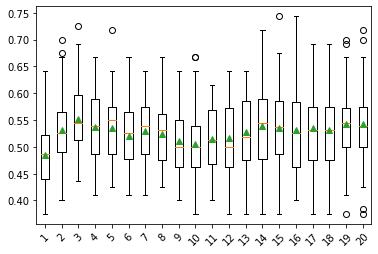

In [12]:
# compare pca number of components with logistic regression algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot

# get the dataset
#def get_dataset():
#	X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
#	return X, y

# get a list of models to evaluate
def get_models():
	models = dict()
	for i in range(1,21):
		steps = [('pca', PCA(n_components=i)), ('m', LogisticRegression())]
		models[str(i)] = Pipeline(steps=steps)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

# define dataset
#X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.xticks(rotation=45)
pyplot.show()

In [13]:
# make predictions using pca with logistic regression
from sklearn.datasets import make_classification
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
# define dataset
#X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
# define the model
steps = [('pca', PCA(n_components=15)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
# fit the model on the whole dataset
model.fit(X, y)
# make a single prediction
#row = [[0.2929949,-4.21223056,-1.288332,-2.17849815,-0.64527665,2.58097719,0.28422388,-7.1827928,-1.91211104,2.73729512,0.81395695,3.96973717,-2.66939799,3.34692332,4.19791821,0.99990998,-0.30201875,-4.43170633,-2.82646737,0.44916808]]
yhat = model.predict(y)
print('Predicted Class: %d' % yhat)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


ValueError: Expected 2D array, got 1D array instead:
array=[2. 2. 2. 3. 2. 3. 3. 2. 4. 3. 2. 3. 3. 3. 3. 3. 3. 2. 2. 2. 3. 3. 3. 3.
 2. 2. 3. 3. 3. 3. 3. 4. 3. 3. 3. 2. 4. 3. 3. 3. 3. 3. 4. 3. 2. 2. 3. 4.
 3. 2. 3. 3. 2. 3. 3. 2. 3. 3. 2. 3. 3. 3. 2. 2. 2. 3. 3. 2. 2. 3. 3. 2.
 2. 3. 3. 2. 2. 3. 2. 2. 3. 3. 2. 3. 2. 2. 2. 3. 2. 2. 2. 4. 2. 2. 3. 2.
 3. 2. 3. 2. 2. 4. 3. 2. 4. 3. 2. 4. 3. 3. 4. 2. 3. 4. 2. 3. 3. 3. 2. 3.
 3. 3. 3. 3. 2. 3. 3. 2. 1. 4. 1. 1. 3. 3. 1. 1. 1. 1. 3. 3. 1. 2. 3. 3.
 1. 3. 1. 3. 1. 2. 1. 3. 2. 1. 3. 2. 3. 2. 3. 3. 1. 2. 1. 2. 2. 3. 2. 3.
 1. 3. 1. 3. 2. 1. 2. 2. 3. 2. 2. 3. 2. 3. 4. 2. 3. 3. 3. 3. 2. 2. 3. 2.
 2. 2. 3. 3. 3. 2. 4. 2. 3. 2. 2. 2. 3. 2. 2. 3. 2. 2. 2. 3. 3. 2. 2. 3.
 2. 2. 2. 2. 2. 1. 4. 3. 3. 2. 3. 3. 2. 3. 3. 3. 2. 3. 2. 2. 3. 3. 3. 1.
 3. 3. 1. 3. 1. 4. 3. 2. 2. 3. 2. 2. 2. 2. 3. 2. 3. 3. 3. 1. 4. 2. 3. 2.
 1. 4. 2. 3. 2. 1. 2. 3. 3. 3. 2. 3. 2. 2. 2. 2. 2. 2. 3. 2. 3. 3. 4. 3.
 3. 3. 3. 3. 3. 4. 3. 3. 1. 2. 3. 3. 3. 2. 3. 4. 3. 3. 4. 2. 3. 2. 1. 3.
 3. 3. 3. 3. 1. 2. 2. 3. 3. 2. 3. 3. 3. 3. 3. 2. 2. 3. 2. 3. 1. 1. 1. 3.
 3. 1. 4. 2. 3. 1. 3. 1. 2. 3. 3. 2. 3. 3. 2. 3. 2. 2. 3. 2. 3. 3. 2. 3.
 3. 3. 2. 3. 3. 2. 3. 1. 2. 3. 2. 3. 3. 2. 4. 2. 3. 2. 3. 2. 3. 2. 2. 1.
 2. 2. 2. 1. 2. 1. 2. 3. 2. 2. 2.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
from sklearn.linear_model import LogisticRegression # Logistic Regression Classifier
from sklearn.tree import DecisionTreeClassifier     # Decision Tree Classifier
from sklearn.svm import SVC                         # SVM Classifier
from sklearn.naive_bayes import GaussianNB          # Naive Bayes Classifier
from sklearn.neighbors import KNeighborsClassifier  # KNN Classifier
from sklearn.ensemble import RandomForestClassifier # Random Forest Classifier

logistic_classifier = LogisticRegression(random_state = 0, solver='lbfgs', max_iter= 1000)
decision_classifier = DecisionTreeClassifier()
svm_classifier = SVC()
knn_classifier = KNeighborsClassifier(n_neighbors=5)
naive_classifier = GaussianNB().fit(X_train, y_train)
random_classifier = RandomForestClassifier(max_depth=3, min_samples_leaf=5, random_state=0)


logistic_classifier.fit(X_train, y_train)
decision_classifier.fit(X_train, y_train)
svm_classifier.fit(X_train, y_train)
knn_classifier.fit(X_train, y_train)
naive_classifier.fit(X_train, y_train)
random_classifier.fit(X_train, y_train)

logistic_y_prediction = logistic_classifier.predict(X_test) 
decision_y_prediction = decision_classifier.predict(X_test) 
svm_y_prediction = svm_classifier.predict(X_test) 
knn_y_prediction = knn_classifier.predict(X_test) 
naive_y_prediction = naive_classifier.predict(X_test) 
random_y_prediction = random_classifier.predict(X_test)

from sklearn.metrics import classification_report, accuracy_score
print(accuracy_score(logistic_y_prediction, y_test))
print(accuracy_score(decision_y_prediction, y_test))
print(accuracy_score(svm_y_prediction, y_test))
print(accuracy_score(knn_y_prediction, y_test))
print(accuracy_score(naive_y_prediction, y_test))
print(accuracy_score(random_y_prediction, y_test)) 

In [ ]:
from scipy import stats
import matplotlib.pyplot as plt
nsample = 395
np.random.seed(7654321)

#A t distribution with small degrees of freedom:


ax1 = plt.subplot(221)
x = stats.t.rvs(3, size=nsample)
res = stats.probplot(x, plot=plt)

#A t distribution with larger degrees of freedom:


ax2 = plt.subplot(222)
x = stats.t.rvs(25, size=nsample)
res = stats.probplot(x, plot=plt)

#A mixture of two normal distributions with broadcasting:


ax3 = plt.subplot(223)
x = stats.norm.rvs(loc=[0,5], scale=[1,1.5],
                   size=(nsample//2,2)).ravel()
res = stats.probplot(x, plot=plt)

#A standard normal distribution:


ax4 = plt.subplot(224)
x = stats.norm.rvs(loc=0, scale=1, size=nsample)
res = stats.probplot(x, plot=plt)

#Produce a new figure with a loggamma distribution, using the dist and sparams keywords:


fig = plt.figure()
ax = fig.add_subplot(111)
x = stats.loggamma.rvs(c=2.5, size=500)
res = stats.probplot(x, dist=stats.loggamma, sparams=(2.5,), plot=ax)
ax.set_title("Probplot for loggamma dist with shape parameter 2.5")

#Show the results with Matplotlib:

plt.show()